In [55]:
import numpy as np

In [13]:
import matplotlib.pyplot as plt

# subhalos evolution

In [6]:
dat = np.array([84,85,86,87,88,89,91,92,94,95,97,99])

In [7]:
redshift = np.loadtxt('/home/yunzheng/mock/orphan/redshift.txt')

In [9]:
redshift_new = redshift[dat]

In [306]:
redshift[99]

1.1920930376163597e-07

In [305]:
redshift_new

array([5.27653755e-01, 4.84852478e-01, 4.43556025e-01, 4.03319929e-01,
       3.64156349e-01, 3.26070824e-01, 2.53440511e-01, 2.18258023e-01,
       1.51393022e-01, 1.19393820e-01, 5.79988018e-02, 1.19209304e-07])

In [11]:
subhalo = np.array([23698977,23628529,23558705,23485129,23406358,23327741,23170543,23086613,22926744,22848649,22689591,22540115])

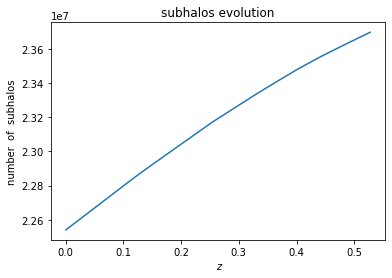

In [22]:
plt.plot(redshift_new,subhalo)
plt.title(r'subhalos evolution')
plt.xlabel(r' $z$ ')
plt.ylabel(r'number  of  subhalos')
# plt.legend(('z = 0.1','z = 0.2','z = 0.3'),facecolor='white', framealpha=1)
# # plt.legend()
plt.savefig('/home/yunzheng/mock/abundance_new/picture/subhalos.pdf',dpi = 100)

In [23]:
orphans = np.array([11098847,11388399,11669048,11945120,12215459,12479986,12988520,13236340,13710478,13937979,14379313,14797002])

In [25]:
final_orphan = np.array([2720813,2779218,2834633,2889705,2944501,2997831,3103668,3155041,3255078,3303594,3399095,3489747])

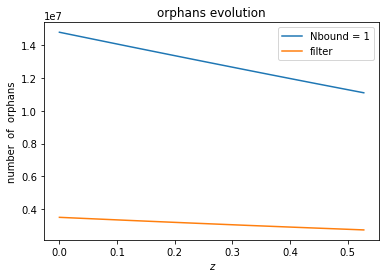

In [35]:
plt.plot(redshift_new,orphans,label = 'Nbound = 1')
plt.plot(redshift_new,final_orphan,label = 'filter')
# plt.yscale('log')
plt.title(r'orphans evolution')
plt.xlabel(r' $z$ ')
plt.ylabel(r'number  of  orphans')
# plt.legend(('z = 0.1','z = 0.2','z = 0.3'),facecolor='white', framealpha=1)
plt.legend()
plt.savefig('/home/yunzheng/mock/abundance_new/picture/orphans.pdf',dpi = 100)

In [36]:
total_subhalos = final_orphan + subhalo

In [37]:
total_subhalos

array([26419790, 26407747, 26393338, 26374834, 26350859, 26325572,
       26274211, 26241654, 26181822, 26152243, 26088686, 26029862])

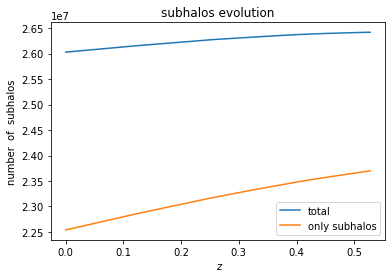

In [47]:
plt.plot(redshift_new,total_subhalos,label = 'total')
plt.plot(redshift_new,subhalo,label = 'only subhalos')
# plt.ylim(2*10**7,3*10**7)
# plt.yscale('log')
plt.title(r'subhalos evolution')
plt.xlabel(r' $z$ ')
plt.ylabel(r'number  of  subhalos')
# plt.legend(('z = 0.1','z = 0.2','z = 0.3'),facecolor='white', framealpha=1)
plt.legend()
plt.savefig('/home/yunzheng/mock/abundance_new/picture/total_orphan.pdf',dpi = 100)

# halo abundance

In [61]:
from AbundanceMatching import *

In [161]:
box_size = 600

In [48]:
subhalos_84 = np.loadtxt('/home/yunzheng/mock/subhalos_new/subhalotable/snapshot_84.txt')

In [81]:
v_subhalo_84 = subhalos_84[:,4]

In [222]:
subhalos_84[2][10]

-142.39645385742188

In [216]:
max(a)

599.9999375

In [220]:
a

array([294.95828125, 286.04996875, 188.50992188, ..., 322.354     ,
       590.2690625 , 114.04569531])

In [214]:
a = subhalos_84[:,8] / 1000

In [73]:
v_subhalo = [[]for _ in range(100)]
for i in dat:
    v_subhalo.append(np.loadtxt('/home/yunzheng/mock/subhalos_new/subhalotable/snapshot_%i.txt'%i,usecols = 4))

In [ ]:
v_subhalo_new = []
for i in dat:
    v_subhalo_new.append(np.loadtxt('/home/yunzheng/mock/subhalos_new/subhalotable/snapshot_%i.txt'%i,usecols = 4))

In [172]:
v_subhalo_new

NameError: name 'v_subhalo_new' is not defined

In [101]:
v_subhalo[100]

array([306.27947998, 410.79251099, 434.70037842, ...,  41.04964447,
        44.20691299,  42.51467896])

In [103]:
v_subhalo[111]

array([489.82223511, 439.21560669, 432.51705933, ...,  37.90246582,
        34.04052734,  39.52687836])

In [117]:
v_subh = []
for i in range(12):
    v_subh.append(v_subhalo[100+i])

In [104]:
v_orphan = []
for i in dat:
    v_orphan.append(np.load('/home/yunzheng/mock/orphan_new/final_selection_new/snapshot_%d/orphantable_final.npy'%i))

In [223]:
b = v_orphan[0][:,9]

In [203]:
v_orphan[0].shape

(2720813, 12)

In [213]:
max(b)

599.9999375

In [224]:
b

array([-440.59811401,  239.20153809, -146.37049866, ..., -233.98657227,
       -101.32239532, -133.10237122])

In [217]:
bbb = np.concatenate((a,b))

In [218]:
bbb[23698976:23698978]

array([114.04569531, 411.19984375])

In [129]:
v_orp = []
for i in range(12):
    v_orp.append(v_orphan[i][:,4])

In [134]:
v_all_84 = np.concatenate((v_subh[0],v_orp[0]))

In [136]:
v_all_85 = np.concatenate((v_subh[1],v_orp[1]))
v_all_86 = np.concatenate((v_subh[2],v_orp[2]))
v_all_87 = np.concatenate((v_subh[3],v_orp[3]))
v_all_88 = np.concatenate((v_subh[4],v_orp[4]))
v_all_89 = np.concatenate((v_subh[5],v_orp[5]))
v_all_91 = np.concatenate((v_subh[6],v_orp[6]))
v_all_92 = np.concatenate((v_subh[7],v_orp[7]))
v_all_94 = np.concatenate((v_subh[8],v_orp[8]))
v_all_95 = np.concatenate((v_subh[9],v_orp[9]))
v_all_97 = np.concatenate((v_subh[10],v_orp[10]))
v_all_99 = np.concatenate((v_subh[11],v_orp[11]))


In [138]:
v_all_99.shape

(26029862,)

In [137]:
print(np.min(v_all_84))
print(np.max(v_all_84))

33.690425872802734
1742.2791748046875


In [ ]:
v_all.append(v_all_84,v_all_85,v_all_86,v_all_87,v_all_88)

In [157]:
v_all = [[]for _ in range(12)]
for x in range(12):
    v_all[x] = np.concatenate((v_subh[x],v_orp[x]))

In [225]:
v_all[11].shape

(26029862,)

Text(0, 0.5, 'Abundance of subhalos')

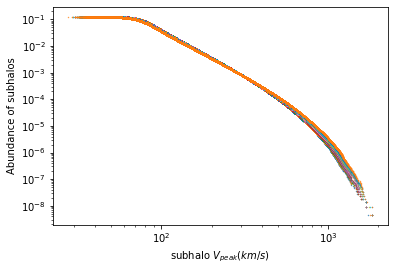

In [165]:
#get number densities of the subhalo catalog
nd_halos = [[]for _ in range(12)]
for i in range(12):
    nd_halos[i] = calc_number_densities(v_all[i], box_size)
    plt.scatter(v_all[i],nd_halos[i],s = 0.15)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'subhalo $ V_{peak} (km/s) $')
plt.ylabel(r'Abundance of subhalos')

# Abundance Matching Learning

### Yang's code

In [231]:
box_size = 600
from AbundanceMatching import *

Text(0, 0.5, 'Abundance of subhalos')

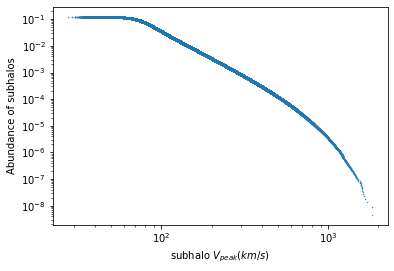

In [229]:
plt.scatter(v_all[11],nd_halos[11],s = 0.2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'subhalo $ V_{peak} (km/s) $')
plt.ylabel(r'Abundance of subhalos')

In [230]:
lfBlanton = np.loadtxt('/home/yunzheng/code/yanglei/yanglei/data/full1/vmax/lfvmax-q2.00a-1.00.dr72full1.dat')
lfB03x=lfBlanton[:,0]
lfB03y=lfBlanton[:,1]

In [513]:
af = AbundanceFunction(lfB03x, lfB03y, (-27, -5))

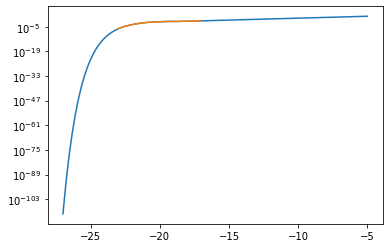

In [277]:
x = np.linspace(-27, -5, 101)
plt.semilogy(x,af(x))
# plt.xlim(-23,-17)
# plt.ylim(10**(-6),10**(-1))
plt.semilogy(lfB03x, lfB03y)

In [318]:
###luminosity function###
#############################
def luminosity_evolution(M,M_star0,phi_star0,alpha,P,Q,z):
    M_star = M_star0 - Q * (z - 0.1)
    phi_star = phi_star0 * np.power(10,0.4 * P * z)
    y = 0.4 * np.log(10) * phi_star * (np.power(10,(0.4 * (M_star - M)))) ** (1 + alpha) * np.exp(- 10 ** (0.4 * (M_star - M)))
    return y


M_star_Blanton = -20.44
phi_star_Blanton = 0.0149
P_Blanton = 0.18
Q_Blanton = 1.62
alpha_Blanton = -1.05


M_star_Loveday = -20.70
phi_star_Loveday = 0.0094
P_Loveday = 1.8
Q_Loveday = 0.7
alpha_Loveday = -1.23

def omega(z):
    y = (1 + np.exp(-100 * (z - 0.15))) ** (-1)
    return y

def phi_total(M,z):
    y = (1 - omega(z)) * luminosity_evolution(M,M_star_Blanton,phi_star_Blanton,alpha_Blanton,P_Blanton,Q_Blanton,z) + omega(z) * luminosity_evolution(M,M_star_Loveday,phi_star_Loveday,alpha_Loveday,P_Loveday,Q_Loveday,z)
    return y

def luminosity_final(M,z):
    if z <= 0.1:
        phi_1 = luminosity_evolution(M,M_star_Blanton,phi_star_Blanton,alpha_Blanton,P_Blanton,Q_Blanton,z)
        return phi_1
    if 0.1 < z < 0.2:
        phi_2 = phi_total(M,z)
        return phi_2
    if z >= 0.2:
        phi_3 = luminosity_evolution(M,M_star_Loveday,phi_star_Loveday,alpha_Loveday,P_Loveday,Q_Loveday,z)
        return phi_3


In [473]:
print(max(lfB03x))
print(min(lfB03x))

-17.030001
-22.969999


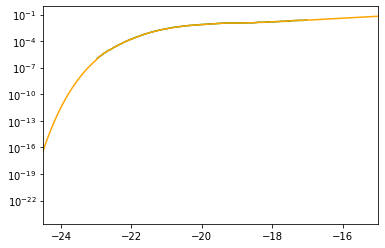

In [520]:
caf = AbundanceFunction(lfB03x, lfB03y, (-27, -5))

nstep=1000
lfx0 = np.linspace(-25,-15,nstep)
lfy0 = caf(lfx0)

# plt.plot(lfx0,lfy_test,"r",".")
plt.yscale('log')
plt.xlim(-24.5,-15)
plt.semilogy(lfB03x, lfB03y,'g')
plt.semilogy(lfx0,lfy0,'orange')

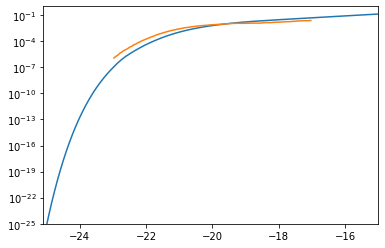

In [279]:
x, nd = af.get_number_density_table()
plt.plot(x,nd)
plt.yscale('log')
plt.xlim(-25.1,-15)
plt.ylim(10**(-25),10**(0))
plt.semilogy(lfB03x, lfB03y)

In [511]:
from scipy import integrate
yint0= integrate.cumtrapz(lfy0,lfx0,initial=0)                   
yint1=yint0[1:] 
lfx1=lfx0[1:] 
lfy1=lfy0[1:]

In [441]:
af.number_density_at(-24.81)

1.0831977050835262e-22

(1e-25, 1.0)

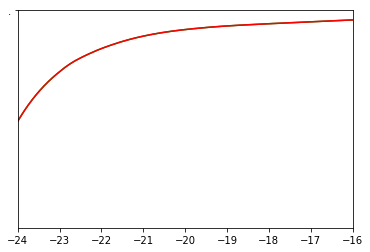

In [512]:
# compare number density by integrate with AbundanceMatching
# plt.plot(lfx1,yint1,'blue')
plt.semilogy(lfx1,yint1,'g',':')
plt.plot(x,nd,'r','.')
plt.xlim(-24,-16)
plt.ylim(10**(-25),10**(0))

In [514]:
catalog = af.match(nd_halos[11])

In [530]:
catalog

array([-21.69939819, -21.5784277 , -21.56075488, ..., -15.17769065,
       -15.16934134, -15.17151513])

In [313]:
nd_halos[11][::-1]

array([0.12037501, 0.12050568, 0.12000459, ..., 0.00021806, 0.00020517,
       0.00013285])

In [310]:
max(nd_halos[11])

0.12050862037037037

In [518]:
ndhalo=nd_halos[11]                                                                                                
newmag0 = np.interp(ndhalo, yint1, lfx1)
newmag=newmag0

In [519]:
newmag

array([-21.69951403, -21.57857693, -21.56085816, ..., -15.17770803,
       -15.16936239, -15.17153857])

In [300]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 30000000

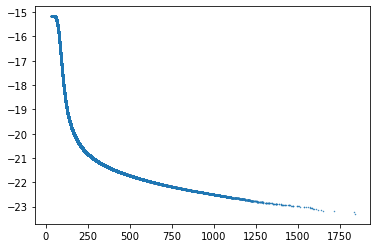

In [304]:
plt.scatter(v_all[11],newmag,s = 0.2)
# plt.yscale('log')

In [294]:
v_all[11].shape

(26029862,)

In [295]:
newmag.shape

(26029862,)

In [336]:
ndhalo_test=nd_halos[11]                                                                                              
newmag0 = np.interp(ndhalo_test, yint1, lfx1)
newmag_test=newmag0

In [337]:
newmag_test

array([-21.69944732, -21.57854788, -21.56084419, ..., -15.17770749,
       -15.16935528, -15.17153076])

In [449]:
lfx0

array([-25.        , -24.98998999, -24.97997998, -24.96996997,
       -24.95995996, -24.94994995, -24.93993994, -24.92992993,
       -24.91991992, -24.90990991, -24.8998999 , -24.88988989,
       -24.87987988, -24.86986987, -24.85985986, -24.84984985,
       -24.83983984, -24.82982983, -24.81981982, -24.80980981,
       -24.7997998 , -24.78978979, -24.77977978, -24.76976977,
       -24.75975976, -24.74974975, -24.73973974, -24.72972973,
       -24.71971972, -24.70970971, -24.6996997 , -24.68968969,
       -24.67967968, -24.66966967, -24.65965966, -24.64964965,
       -24.63963964, -24.62962963, -24.61961962, -24.60960961,
       -24.5995996 , -24.58958959, -24.57957958, -24.56956957,
       -24.55955956, -24.54954955, -24.53953954, -24.52952953,
       -24.51951952, -24.50950951, -24.4994995 , -24.48948949,
       -24.47947948, -24.46946947, -24.45945946, -24.44944945,
       -24.43943944, -24.42942943, -24.41941942, -24.40940941,
       -24.3993994 , -24.38938939, -24.37937938, -24.36

In [452]:
af_test(lfx0)[:20]

array([1.24283053e-31, 2.28856611e-31, 4.19848348e-31, 7.67355535e-31,
       1.38972841e-30, 2.50768544e-30, 4.50849040e-30, 8.03420411e-30,
       1.42658017e-29, 2.52408132e-29, 4.42776694e-29, 7.73996488e-29,
       1.34829537e-28, 2.32928289e-28, 4.01017108e-28, 6.88069792e-28,
       1.17113370e-27, 1.98661642e-27, 3.35882013e-27, 5.63473647e-27])

In [502]:
lfy_test[:20]

array([3.50474542e-14, 1.43711671e-12, 3.51245516e-11, 5.50029648e-10,
       5.87234027e-09, 4.50931699e-08, 2.60775591e-07, 1.18160450e-06,
       4.34028739e-06, 1.33086175e-05, 3.49353910e-05, 8.02301892e-05,
       1.64231158e-04, 3.04504081e-04, 5.18502778e-04, 8.20525905e-04,
       1.21915458e-03, 1.71582262e-03, 2.30473727e-03, 2.97395968e-03])

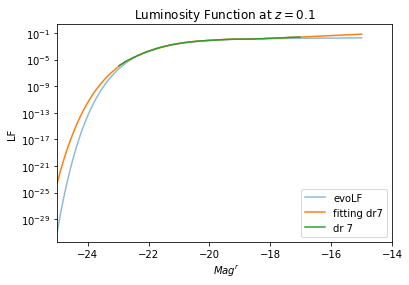

In [521]:
lfy_test = luminosity_final(lfx0,0.1)
af_test = AbundanceFunction(lfx0,lfy_test,(-25,-10))
plt.plot(lfx0,lfy_test,alpha = 0.5,label = 'evoLF')
# plt.plot(lfx0,af_test(lfx0),'green',alpha = 0.5)
plt.yscale('log')

# plt.yscale('log')
plt.xlim(-25,-14)
plt.semilogy(lfx0,lfy0,label = 'fitting dr7')
plt.semilogy(lfB03x,lfB03y,label = 'dr 7 ')

plt.title(r'Luminosity Function at $z = 0.1$')
plt.xlabel(r' $Mag^r$ ')
plt.ylabel(r'LF')
# plt.legend(('z = 0.1','z = 0.2','z = 0.3'),facecolor='white', framealpha=1)
plt.legend()
# plt.savefig('/home/yunzheng/mock/abundance_new/picture/lfz=0.1error.pdf',dpi = 100)

In [522]:
yint0_test= integrate.cumtrapz(lfy_test,lfx0,initial=0)   
yint_test2 = integrate.cumtrapz(af_test(lfx0),lfx0,initial=0)
yint1_test= yint0_test[1:] 
yint1_test2 = yint_test2[1:]

In [523]:
catalog_test = af_test.match(nd_halos[11])

In [525]:
# ndhalo_test=nd_halos[11]                                                                                              
newmag0_test = np.interp(ndhalo_test, yint1_test, lfx0[1:])
newmag_test = newmag0_test

In [526]:
newmag0_test_2 = np.interp(ndhalo_test, yint1_test2, lfx0[1:])
newmag_test_2 = newmag0_test_2

In [527]:
newmag_test_2

array([-21.72301719, -21.60347829, -21.58581225, ..., -15.        ,
       -15.        , -15.        ])

In [539]:
newmag_test

array([-21.72304336, -21.60350429, -21.58583799, ..., -15.        ,
       -15.        , -15.        ])

In [538]:
catalog_test

array([-21.72293576, -21.60340617, -21.58576106, ..., -12.71869144,
       -12.69372768, -12.70023675])

In [ ]:
plt.scatter(v_all[11],catalog,s = 0.05)
plt.scatter(v_all[11],catalog_test,s=0.05,marker = '*')

plt.title(r'Matched set comparison')
plt.xlabel(r' $Vpeak$ ')
plt.ylabel(r'Magnitude')
plt.legend(('dr7','evoLF'),facecolor='white', framealpha=1)
plt.savefig('/home/yunzheng/mock/abundance_new/picture/Matchfail.pdf',dpi = 100)

In [536]:
plt.scatter?

Signature:
plt.scatter(
    x,
    y,
    s=None,
    c=None,
    marker=None,
    cmap=None,
    norm=None,
    vmin=None,
    vmax=None,
    alpha=None,
    linewidths=None,
    verts=<deprecated parameter>,
    edgecolors=None,
    *,
    plotnonfinite=False,
    data=None,
    **kwargs,
)
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2.
    Default is ``rcParams['lines.markersize'] ** 2``.

c : array-like or list of colors or color, optional
    The marker colors. Possible values:

    - A scalar or sequence of n numbers to be mapped to colors using
      *cmap* and *norm*.
    - A 2-D array in which the rows are RGB or RGBA.
    - A sequence of colors of length n.
    - A single color format string.

    Note that *c* should not be a single numeric RGB or RGBA sequence
    because tha